In [8]:
from diffusers import DiffusionPipeline
import torch
from genaibook.core import get_device
from huggingface_hub import model_info

In [9]:
device = get_device()

In [3]:
# Cartoon model
lora_model_id = "alvdansen/littletinies"

In [4]:
# Determine base model (stable diffusion xl-base-1.0)
info = model_info(lora_model_id)
base_model_id = info.card_data.base_model

In [7]:
# Load base model
pipe = DiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16)

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [10]:
pipe = pipe.to(device)

In [11]:
pipe.load_lora_weights(lora_model_id)

Little_Tinies.safetensors:   0%|          | 0.00/228M [00:00<?, ?B/s]

In [12]:
pipe.fuse_lora()

  0%|          | 0/25 [00:00<?, ?it/s]

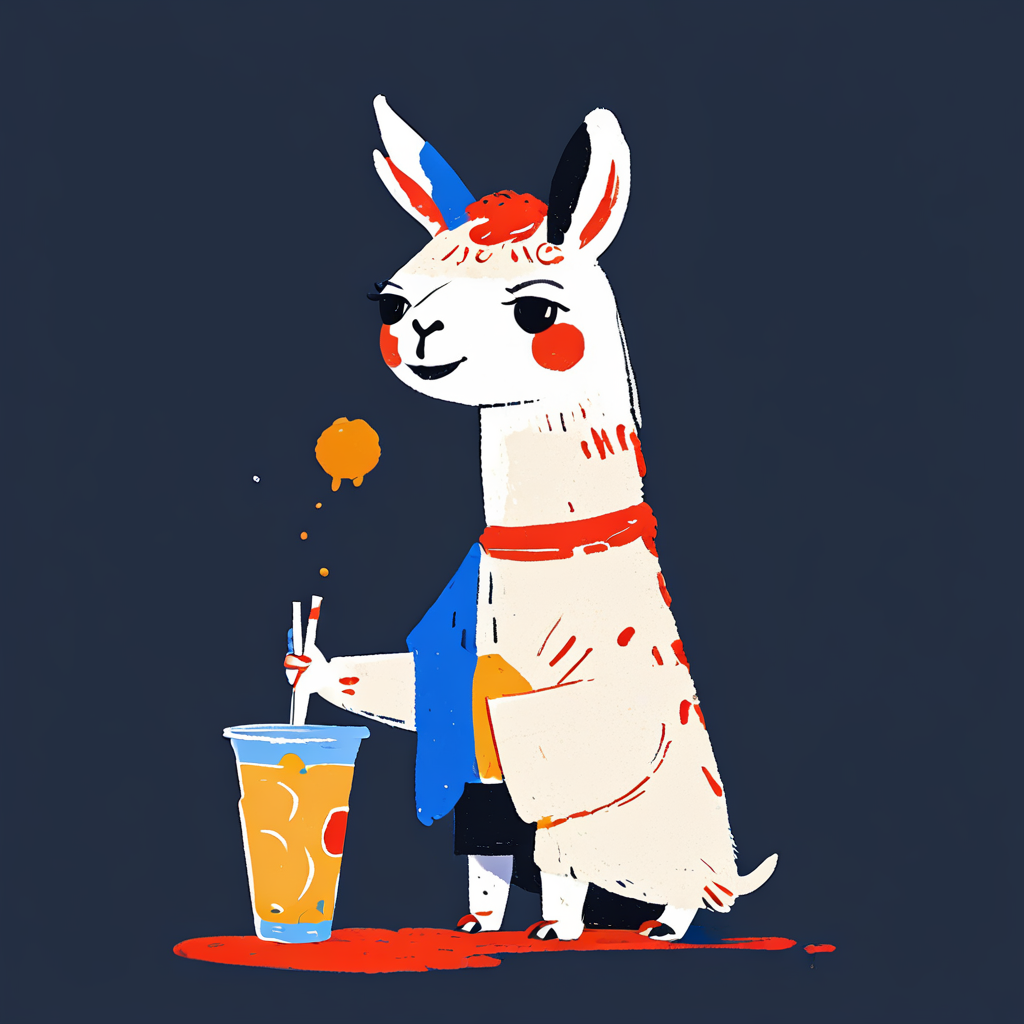

In [13]:
image = pipe("A llama drinking boba tea", num_inference_steps=25, guidance_scale=7.5).images[0]
image